## Getting real data to estimate brazil parameters

In [1]:
import pandas as pd
df = pd.read_csv("brazil_parameters/md_20230731.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [2]:
df["timestamp"] =  df["timestamp"] - df["timestamp"].min()
df["time"] = (df['timestamp'] - df['timestamp'].min()).dt.total_seconds()

In [3]:
import numpy as np
tau0_plus = np.array([df[df["ismoplus"]]['time'].unique()])
tau0_minus = np.array([df[df["ismominus"]]['time'].unique()])
t_minus = np.array([df[df["isjumpplus"]]['time'].unique()])
t_plus = np.array([df[df["isjumpminus"]]['time'].unique()])
T=df["time"].max()

tau0_plus

array([[   38.838,    38.839,    38.84 , ..., 32485.524, 32485.525,
        32485.526]])

In [19]:
l = 20000
tau0_plus = tau0_plus[:,:l]
tau0_minus = tau0_minus[:,:l]
t_minus = t_minus[:,:l]
t_plus = t_plus[:,:l]

In [20]:
import numpy as np
t_ = df["time"].diff()
dt_min = t_[t_!=0.0].min()

In [26]:
import numpy as np
from scipy.optimize import minimize
from scipy import optimize
from likelihood import MaximumLikelihood


def likelihood_to_minimize(y=None,x=None, k=200, theta=0.1):
    bad_result = np.nan #
    if y is not None:
        x=np.array([y[0], y[1], y[1], y[2]])
        bad_result = 1000 # 
    if np.abs(x[1]-x[2]) >20:
        return bad_result
    if x[0]<0 or x[1]<0 or x[2]<0 or x[3]<0:
        return bad_result
    if x[0]>1500 or x[1]>1500 or x[2]>1500 or x[3]>1500:
        return bad_result
    m = MaximumLikelihood(
        T,
        tau0_plus,
        tau0_minus,
        t_plus,
        t_minus
    )
    m = m.likelihood_to_minimize(x)/l/1000
    if np.isnan(m) or np.isinf(m):
        m = 1000
    print(m)
    return m
x0 = np.array([10, 100, 1])  # the 4 parameters to optimize
bounds = [(1, 500), (1, 200),(0, 1)]
res = minimize(likelihood_to_minimize, x0, method='BFGS',#
               #bounds=bounds,
               options={'disp': True, 
                        # 'maxiter':1000, "maxfun":2000
                        },
               )
# res = optimize.fmin_cobyla(m.likelihood_to_minimize, x0, cons=[], args=(), maxfun=100000,)
# optimize.differential_evolution(m.likelihood_to_minimize, bounds, args=(), strategy='rand1exp', maxiter=10000, popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7, seed=None, callback=None, disp=False, polish=True, init='latinhypercube', atol=0, updating='immediate', workers=1, constraints=(), x0=None,)

print(res)

0.0033718893686617885
0.0033718893683610724
0.003371889368690138
0.0033718894169161677
0.0033614024469302024
0.0033614024466294876
0.0033614024469585525
0.0033614024951840855
0.0033194558489944618
0.003319455848693751
0.003319455849022811
0.0033194558972463265
0.003151687715031756
0.003151687714731065
0.003151687715060105
0.0031516877632749903
0.002480974924707032
0.0024809749244064146
0.0024809749247353768
0.002480974972903402
0.002480973726353624
0.0024809737260530072
0.0024809737263819685
0.002480973774549994
0.002474026698372918
0.0024740266980723016
0.002474026698401263
0.0024740267465686618
0.0011396364176102698
0.0011396364173098014
0.001139636417638607
0.0011396364655233615
0.00027515002704396304
0.00027515002674359236
0.0002751500270722946
0.00027515007124418757
0.0002751500144216233
0.0002751500141212525
0.00027515001444995484
0.00027515005862184733
0.0002751500089233325
0.0002751500086229618
0.00027515000895166406
0.0002751500531235563
0.0002751500065282769
0.000275150006227

In [27]:
import numpy as np
from scipy.optimize import minimize
from scipy import optimize
from likelihood import MaximumLikelihood

# def multi_objective_function(x):
#     return [objective_function1(x), objective_function2(x)]
x0 = np.array([10, 100, 1])  # the 4 parameters to optimize
bounds = [(1, 500), (1, 200),(0, 1)]
res = minimize(likelihood_to_minimize, x0, method='Nelder-Mead',#
               bounds=bounds,
               options={'disp': True, 
                        # 'maxiter':1000, "maxfun":2000
                        },
               )
# res = optimize.fmin_cobyla(m.likelihood_to_minimize, x0, cons=[], args=(), maxfun=100000,)
# optimize.differential_evolution(m.likelihood_to_minimize, bounds, args=(), strategy='rand1exp', maxiter=10000, popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7, seed=None, callback=None, disp=False, polish=True, init='latinhypercube', atol=0, updating='immediate', workers=1, constraints=(), x0=None,)

print(res)

0.0033718893686617885
0.0033622967760822352
0.0033814139513331444
0.0033718893686617885
0.0033562105564193894
0.0033442758339256224
0.003347476224808254
0.00333291601363937
0.0033163696723495233
0.0033107849904641575
0.003288354990252872
0.0032867829418879286
0.003261963373556722
0.00324611059894696
0.0032162897721329116
0.003208431057739389
0.003217267792866143
0.0032172469577424027
0.003217118438341164
0.00321541057707177
0.0032447199632728244
0.00320578948526421
0.003205851991595472
0.0032172742387412303
0.003209917068322733
0.0032088499561372837
0.003206114484652865
0.0032073262361156634
0.0032057906308267086
0.003205142776840323
0.0032048531133545485
0.003204693837069212
0.0032043217385114373
0.0032058610231788997
0.003205005945633834
0.0032037375159239844
0.0032029588636974813
0.0032031371002815864
0.003202134324193228
0.0032010209527294255
0.0032006348154130166
0.0031990909133154024
0.003199203621122452
0.003197117447347941
0.0031951273500397184
0.0031953839513256654
0.003194155

-0.04844074210226284
0.017833537615296415


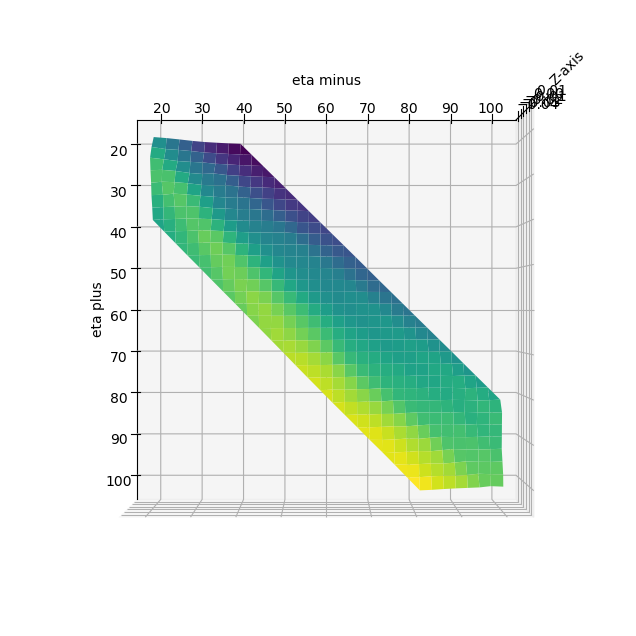

In [ ]:
z_min, z_max = np.nanmin(z), np.nanmax(z)
print(z_min)
print(z_max)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.view_init(elev=90, azim=00)
# Add labels
ax.set_xlabel('eta plus')
ax.set_ylabel('eta minus')
ax.set_zlabel('Z-axis')

# ax.scatter(x_min, y_min, z_min, color='red', marker='o', s=100, label='Minimum Point')

# Show the plot
plt.show()